<a href="https://colab.research.google.com/github/MangoDingo33/Study/blob/main/%ED%8A%B9%EA%B0%95/1011ECGPeakDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install heartpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.1 MB/s eta 0:00:00


In [ ]:
pip install neurokit2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.7 MB/s eta 0:00:00


In [ ]:
pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import heartpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import neurokit2 as nk
import matplotlib.pyplot as plt
from pandas import Series
from scipy import signal
import wfdb
import time
import os
import re

In [ ]:
!wget -r -N -c -np https://physionet.org/files/mitdb/1.0.0/

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Length: 5468 (5.3K) [application/octet-stream]
Saving to: ‘physionet.org/files/mitdb/1.0.0/223.atr’

physionet.org/files 100%[===================>]   5.34K  --.-KB/s    in 0s      

2023-10-11 11:03:45 (2.27 GB/s) - ‘physionet.org/files/mitdb/1.0.0/223.atr’ saved [5468/5468]

--2023-10-11 11:03:45--  https://physionet.org/files/mitdb/1.0.0/223.dat
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1950000 (1.9M) [application/octet-stream]
Saving to: ‘physionet.org/files/mitdb/1.0.0/223.dat’

physionet.org/files 100%[===================>]   1.86M  1.19MB/s    in 1.6s    

2023-10-11 11:03:47 (1.19 MB/s) - ‘physionet.org/files/mitdb/1.0.0/223.dat’ saved [1950000/1950000]

--2023-10-11 11:03:47--  https://physionet.org/files/mitdb/1.0.0/223.hea
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 258 [text/plain]
Saving to: ‘physionet.org/files/mitd

In [ ]:
data_dir = 'physionet.org/files/mitdb/1.0.0/'

output_dir = '/content/drive/MyDrive/Colab Notebooks/csv/'

os.makedirs(output_dir, exist_ok = True)

database_list = ['mitdb']

for database in database_list:
  record_list = wfdb.get_record_list(database)

  for record_name in record_list:
    record = wfdb.rdrecord(os.path.join(data_dir, record_name))

    df = pd.DataFrame(record.p_signal, columns= record.sig_name)

    csv_filename = os.path.join(output_dir, record_name + '.csv')
    df.to_csv(csv_filename, index = False)

    print(f'converted {record_name} to CSV: {csv_filename}')

converted 100 to CSV: /content/drive/MyDrive/Colab Notebooks/csv/100.csv
converted 101 to CSV: /content/drive/MyDrive/Colab Notebooks/csv/101.csv
converted 102 to CSV: /content/drive/MyDrive/Colab Notebooks/csv/102.csv
converted 103 to CSV: /content/drive/MyDrive/Colab Notebooks/csv/103.csv
converted 104 to CSV: /content/drive/MyDrive/Colab Notebooks/csv/104.csv
converted 105 to CSV: /content/drive/MyDrive/Colab Notebooks/csv/105.csv
converted 106 to CSV: /content/drive/MyDrive/Colab Notebooks/csv/106.csv
converted 107 to CSV: /content/drive/MyDrive/Colab Notebooks/csv/107.csv
converted 108 to CSV: /content/drive/MyDrive/Colab Notebooks/csv/108.csv
converted 109 to CSV: /content/drive/MyDrive/Colab Notebooks/csv/109.csv
converted 111 to CSV: /content/drive/MyDrive/Colab Notebooks/csv/111.csv
converted 112 to CSV: /content/drive/MyDrive/Colab Notebooks/csv/112.csv
converted 113 to CSV: /content/drive/MyDrive/Colab Notebooks/csv/113.csv
converted 114 to CSV: /content/drive/MyDrive/Colab 

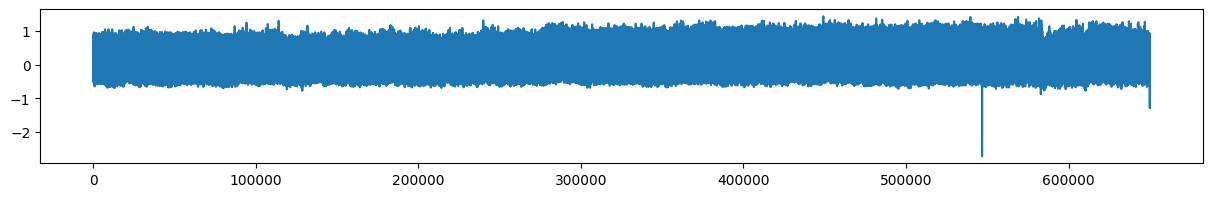

In [ ]:
ECG = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/100.csv')
plt.figure(figsize=(15,2))
plt.plot(ECG.iloc[:,0])

(0.0, 10000.0)

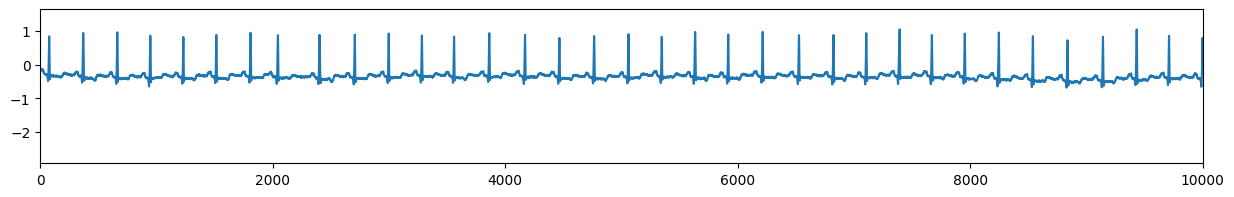

In [ ]:
ECG = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/100.csv')
plt.figure(figsize=(15,2))
plt.plot(ECG.iloc[:,0])
plt.xlim([0,10000])

In [ ]:
data_url = '/content/drive/MyDrive/Colab Notebooks/csv/'
save_url = '/content/drive/MyDrive/Colab Notebooks/bandpass/'
os.makedirs(save_url, exist_ok=True)

csv_files = os.listdir(data_url)

for csv_file in tqdm(csv_files):
  time.sleep(0.1)
  file = os.path.join(data_url, csv_file)

  ECG_bp = pd.read_csv(file, header = 0)
  ECG_bpp = ECG_bp.transpose()

  test = []
  ECG_1 = ECG_bpp.iloc[0]
  ECG_bandpass = hp.filter_signal(ECG_1, cutoff = [0.01, 50], sample_rate= 360.0, order = 3, filtertype='bandpass')

  test.append(ECG_bandpass)

  test = pd.DataFrame(test).transpose()
  output_csv_file = os.path.join(save_url, "ECG_bandpass_" + csv_file)

  print(output_csv_file)
  test.to_csv(output_csv_file, index = False)

  0%|          | 0/48 [00:00<?, ?it/s]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_100.csv


  2%|▏         | 1/48 [00:17<13:29, 17.22s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_101.csv


  4%|▍         | 2/48 [00:32<12:08, 15.84s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_102.csv


  6%|▋         | 3/48 [00:45<10:59, 14.66s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_103.csv


  8%|▊         | 4/48 [01:01<11:09, 15.23s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_104.csv


 10%|█         | 5/48 [01:18<11:23, 15.89s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_105.csv


 12%|█▎        | 6/48 [01:34<11:10, 15.97s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_106.csv


 15%|█▍        | 7/48 [01:48<10:25, 15.25s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_107.csv


 17%|█▋        | 8/48 [02:02<09:56, 14.92s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_108.csv


 19%|█▉        | 9/48 [02:20<10:12, 15.70s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_109.csv


 21%|██        | 10/48 [02:33<09:30, 15.02s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_111.csv


 23%|██▎       | 11/48 [02:52<10:05, 16.36s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_112.csv


 25%|██▌       | 12/48 [03:09<09:49, 16.36s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_113.csv


 27%|██▋       | 13/48 [03:32<10:42, 18.35s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_114.csv


 29%|██▉       | 14/48 [03:47<09:54, 17.48s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_115.csv


 31%|███▏      | 15/48 [04:07<10:00, 18.20s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_116.csv


 33%|███▎      | 16/48 [04:23<09:20, 17.52s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_117.csv


 35%|███▌      | 17/48 [04:41<09:09, 17.74s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_118.csv


 38%|███▊      | 18/48 [04:57<08:29, 17.00s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_119.csv


 40%|███▉      | 19/48 [05:12<07:56, 16.45s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_121.csv


 42%|████▏     | 20/48 [05:30<07:56, 17.02s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_122.csv


 44%|████▍     | 21/48 [05:49<07:53, 17.54s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_123.csv


 46%|████▌     | 22/48 [06:04<07:13, 16.69s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_124.csv


 48%|████▊     | 23/48 [06:19<06:44, 16.18s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_200.csv


 50%|█████     | 24/48 [06:35<06:29, 16.21s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_201.csv


 52%|█████▏    | 25/48 [06:50<06:08, 16.04s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_202.csv


 54%|█████▍    | 26/48 [07:05<05:41, 15.52s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_203.csv


 56%|█████▋    | 27/48 [07:18<05:14, 14.99s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_205.csv


 58%|█████▊    | 28/48 [07:33<04:59, 14.96s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_207.csv


 60%|██████    | 29/48 [07:48<04:40, 14.79s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_208.csv


 62%|██████▎   | 30/48 [08:06<04:44, 15.83s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_209.csv


 65%|██████▍   | 31/48 [08:28<05:01, 17.73s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_210.csv


 67%|██████▋   | 32/48 [08:44<04:34, 17.14s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_212.csv


 69%|██████▉   | 33/48 [09:02<04:20, 17.35s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_213.csv


 71%|███████   | 34/48 [09:21<04:12, 18.03s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_214.csv


 73%|███████▎  | 35/48 [09:39<03:52, 17.88s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_215.csv


 75%|███████▌  | 36/48 [09:56<03:33, 17.76s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_217.csv


 77%|███████▋  | 37/48 [10:16<03:20, 18.23s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_219.csv


 79%|███████▉  | 38/48 [10:33<03:00, 18.06s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_220.csv


 81%|████████▏ | 39/48 [10:56<02:54, 19.37s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_221.csv


 83%|████████▎ | 40/48 [11:16<02:37, 19.63s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_222.csv


 85%|████████▌ | 41/48 [11:36<02:17, 19.67s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_223.csv


 88%|████████▊ | 42/48 [11:56<01:58, 19.69s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_228.csv


 90%|████████▉ | 43/48 [12:17<01:41, 20.34s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_230.csv


 92%|█████████▏| 44/48 [12:40<01:23, 20.99s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_231.csv


 94%|█████████▍| 45/48 [12:59<01:00, 20.33s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_232.csv


 96%|█████████▌| 46/48 [13:18<00:40, 20.01s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_233.csv


 98%|█████████▊| 47/48 [13:39<00:20, 20.42s/it]

/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_234.csv


100%|██████████| 48/48 [13:55<00:00, 17.41s/it]


(0.0, 2000.0)

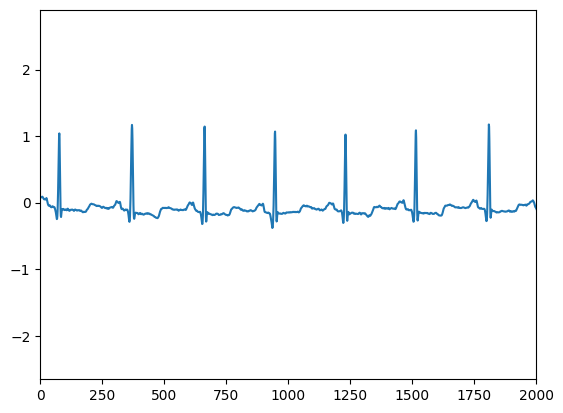

In [ ]:
ECG = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bandpass/ECG_bandpass_100.csv')
# plt.figure(figsize=(8,2))
plt.plot(ECG.iloc[:,0])
plt.xlim([0,2000])

In [ ]:
data_url = '/content/drive/MyDrive/Colab Notebooks/bandpass/'
csv_files = os.listdir(data_url)

number_pattern = re.compile(r'\d+')


for csv_file in tqdm (csv_files):
  time.sleep(0.1)
  file_path = os.path.join(data_url, csv_file)
  file = pd.read_csv(file_path, header=0)

  match = number_pattern.search(csv_file)
  if match:
    folder_number = match.group()

  else:
    folder_number = '1'

  for i in tqdm(range(1, 7)):
    save_url = '/content/drive/MyDrive/Colab Notebooks/10seconds/' + folder_number
    os.makedirs(save_url, exist_ok=True)

    start_idx = (i - 1) * 3600
    end_idx= i * 3600
    ECG_down = file.iloc[start_idx:end_idx]

    output_csv_file = os.path.join(save_url, "ECG bandpass_{0}.csv".format(i))
    print(output_csv_file)
    ECG_down.to_csv(output_csv_file, index=False)

  2%|▏         | 1/48 [00:00<00:16,  2.77it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/100/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/100/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/100/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/100/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/100/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/100/ECG bandpass_6.csv



  4%|▍         | 2/48 [00:00<00:21,  2.17it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/101/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/101/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/101/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/101/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/101/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/101/ECG bandpass_6.csv



  6%|▋         | 3/48 [00:01<00:21,  2.06it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/102/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/102/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/102/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/102/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/102/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/102/ECG bandpass_6.csv



  8%|▊         | 4/48 [00:01<00:21,  2.01it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/103/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/103/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/103/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/103/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/103/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/103/ECG bandpass_6.csv



 10%|█         | 5/48 [00:02<00:21,  1.96it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/104/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/104/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/104/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/104/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/104/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/104/ECG bandpass_6.csv



 12%|█▎        | 6/48 [00:02<00:21,  1.96it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/105/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/105/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/105/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/105/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/105/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/105/ECG bandpass_6.csv



 15%|█▍        | 7/48 [00:03<00:20,  1.96it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/106/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/106/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/106/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/106/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/106/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/106/ECG bandpass_6.csv



 17%|█▋        | 8/48 [00:03<00:20,  1.97it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/107/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/107/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/107/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/107/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/107/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/107/ECG bandpass_6.csv



 19%|█▉        | 9/48 [00:04<00:18,  2.10it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/108/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/108/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/108/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/108/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/108/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/108/ECG bandpass_6.csv



 21%|██        | 10/48 [00:04<00:16,  2.28it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/109/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/109/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/109/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/109/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/109/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/109/ECG bandpass_6.csv



 23%|██▎       | 11/48 [00:05<00:15,  2.41it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/111/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/111/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/111/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/111/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/111/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/111/ECG bandpass_6.csv



 25%|██▌       | 12/48 [00:05<00:14,  2.47it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/112/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/112/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/112/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/112/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/112/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/112/ECG bandpass_6.csv



 27%|██▋       | 13/48 [00:05<00:13,  2.57it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/113/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/113/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/113/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/113/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/113/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/113/ECG bandpass_6.csv



 29%|██▉       | 14/48 [00:06<00:12,  2.63it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/114/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/114/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/114/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/114/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/114/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/114/ECG bandpass_6.csv



 31%|███▏      | 15/48 [00:06<00:12,  2.62it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/115/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/115/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/115/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/115/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/115/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/115/ECG bandpass_6.csv



 33%|███▎      | 16/48 [00:06<00:12,  2.64it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/116/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/116/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/116/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/116/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/116/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/116/ECG bandpass_6.csv



 35%|███▌      | 17/48 [00:07<00:11,  2.68it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/117/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/117/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/117/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/117/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/117/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/117/ECG bandpass_6.csv



 38%|███▊      | 18/48 [00:07<00:11,  2.66it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/118/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/118/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/118/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/118/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/118/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/118/ECG bandpass_6.csv



 40%|███▉      | 19/48 [00:08<00:11,  2.61it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/119/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/119/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/119/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/119/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/119/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/119/ECG bandpass_6.csv



 42%|████▏     | 20/48 [00:08<00:10,  2.59it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/121/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/121/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/121/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/121/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/121/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/121/ECG bandpass_6.csv



 44%|████▍     | 21/48 [00:08<00:10,  2.66it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/122/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/122/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/122/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/122/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/122/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/122/ECG bandpass_6.csv



 46%|████▌     | 22/48 [00:09<00:09,  2.67it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/123/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/123/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/123/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/123/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/123/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/123/ECG bandpass_6.csv



 48%|████▊     | 23/48 [00:09<00:09,  2.72it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/124/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/124/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/124/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/124/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/124/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/124/ECG bandpass_6.csv



 50%|█████     | 24/48 [00:09<00:08,  2.77it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/200/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/200/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/200/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/200/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/200/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/200/ECG bandpass_6.csv



 52%|█████▏    | 25/48 [00:10<00:08,  2.81it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/201/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/201/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/201/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/201/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/201/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/201/ECG bandpass_6.csv



 54%|█████▍    | 26/48 [00:10<00:08,  2.72it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/202/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/202/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/202/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/202/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/202/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/202/ECG bandpass_6.csv



 56%|█████▋    | 27/48 [00:10<00:07,  2.77it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/203/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/203/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/203/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/203/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/203/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/203/ECG bandpass_6.csv



 58%|█████▊    | 28/48 [00:11<00:07,  2.80it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/205/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/205/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/205/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/205/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/205/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/205/ECG bandpass_6.csv



 60%|██████    | 29/48 [00:11<00:06,  2.75it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/207/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/207/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/207/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/207/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/207/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/207/ECG bandpass_6.csv



 62%|██████▎   | 30/48 [00:12<00:06,  2.71it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/208/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/208/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/208/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/208/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/208/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/208/ECG bandpass_6.csv



 65%|██████▍   | 31/48 [00:12<00:06,  2.77it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/209/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/209/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/209/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/209/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/209/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/209/ECG bandpass_6.csv



 67%|██████▋   | 32/48 [00:12<00:05,  2.73it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/210/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/210/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/210/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/210/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/210/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/210/ECG bandpass_6.csv



 69%|██████▉   | 33/48 [00:13<00:05,  2.78it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/212/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/212/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/212/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/212/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/212/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/212/ECG bandpass_6.csv



 71%|███████   | 34/48 [00:13<00:05,  2.77it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/213/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/213/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/213/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/213/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/213/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/213/ECG bandpass_6.csv



 73%|███████▎  | 35/48 [00:13<00:04,  2.71it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/214/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/214/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/214/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/214/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/214/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/214/ECG bandpass_6.csv



 75%|███████▌  | 36/48 [00:14<00:04,  2.68it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/215/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/215/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/215/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/215/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/215/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/215/ECG bandpass_6.csv



 77%|███████▋  | 37/48 [00:14<00:04,  2.46it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/217/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/217/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/217/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/217/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/217/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/217/ECG bandpass_6.csv



 79%|███████▉  | 38/48 [00:15<00:04,  2.28it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/219/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/219/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/219/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/219/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/219/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/219/ECG bandpass_6.csv



 81%|████████▏ | 39/48 [00:15<00:04,  2.16it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/220/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/220/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/220/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/220/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/220/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/220/ECG bandpass_6.csv



 83%|████████▎ | 40/48 [00:16<00:03,  2.11it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/221/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/221/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/221/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/221/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/221/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/221/ECG bandpass_6.csv



 85%|████████▌ | 41/48 [00:16<00:03,  2.02it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/222/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/222/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/222/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/222/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/222/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/222/ECG bandpass_6.csv



 88%|████████▊ | 42/48 [00:17<00:03,  1.94it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/223/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/223/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/223/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/223/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/223/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/223/ECG bandpass_6.csv



 90%|████████▉ | 43/48 [00:17<00:02,  1.91it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/228/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/228/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/228/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/228/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/228/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/228/ECG bandpass_6.csv



 92%|█████████▏| 44/48 [00:18<00:01,  2.06it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/230/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/230/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/230/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/230/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/230/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/230/ECG bandpass_6.csv



 94%|█████████▍| 45/48 [00:18<00:01,  2.25it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/231/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/231/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/231/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/231/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/231/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/231/ECG bandpass_6.csv



 96%|█████████▌| 46/48 [00:19<00:00,  2.39it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/232/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/232/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/232/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/232/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/232/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/232/ECG bandpass_6.csv



 98%|█████████▊| 47/48 [00:19<00:00,  2.46it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/233/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/233/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/233/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/233/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/233/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/233/ECG bandpass_6.csv



100%|██████████| 48/48 [00:19<00:00,  2.42it/s]

/content/drive/MyDrive/Colab Notebooks/10seconds/234/ECG bandpass_1.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/234/ECG bandpass_2.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/234/ECG bandpass_3.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/234/ECG bandpass_4.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/234/ECG bandpass_5.csv
/content/drive/MyDrive/Colab Notebooks/10seconds/234/ECG bandpass_6.csv


In [ ]:
data_url = '/content/drive/MyDrive/Colab Notebooks/10seconds/'

number_pattern = re.compile(r'\d+')

for root, dirs, files in os.walk(data_url):
  for csv_file in tqdm(files):
    time.sleep(0.1)
    file_path = os.path.join(root, csv_file)
    file = pd.read_csv(file_path, header = 0)

    match = number_pattern.search(csv_file)
    if match:
      folder_number = match.group()
    else:
      folder_number = '1'

    folder_name = os.path.basename(root)

    save_url = '/content/drive/MyDrive/Colab Notebooks/rpeak/' + folder_name
    os.makedirs(save_url, exist_ok=True)

    pantompkins1985 = nk.ecg_findpeaks(nk.ecg_clean(file.iloc[:,0], method='pantompkins1985'), method = 'pantompkins1985')
    signals, info = nk.ecg_peaks(file.iloc[:,0], correct_artifacts = False)

    peak = pd.DataFrame(info)

    peak.to_csv(save_url + '/r_peak_{0}.csv'.format(folder_number))

0it [00:00, ?it/s]
100%|██████████| 6/6 [00:00<00:00,  8.02it/s]


Text(0.5, 1.0, 'ECG with R Peak Detection')

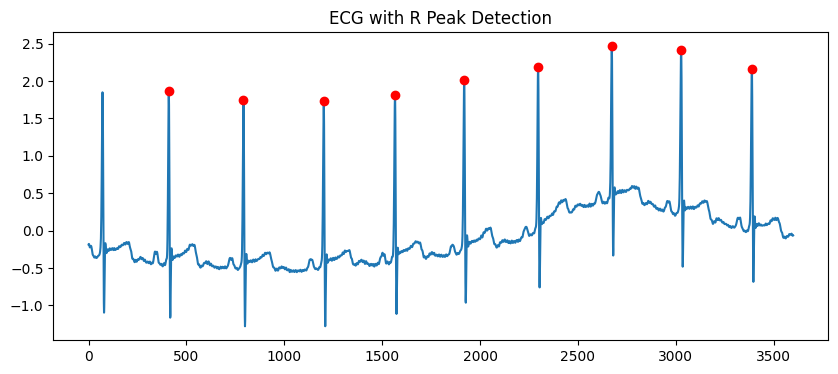

In [ ]:
file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/10seconds/115/ECG bandpass_5.csv')

rpeaks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rpeak/115/r_peak_5.csv')

plt.figure(figsize=(10, 4))
plt.plot(file.iloc[:,0], label = 'Original ECG')
plt.plot(rpeaks['ECG_R_Peaks'], file.iloc[rpeaks["ECG_R_Peaks"], 0], 'ro', label='R Peaks')
plt.title('ECG with R Peak Detection')